## Neural Network Assignment

### Dataset - Forestfire

In [2]:
# Importing important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [106]:
# Load dataset
data = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/16 Neural Network/forestfires.csv')

In [107]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [108]:
data.shape

(517, 31)

In [109]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### Check and drop the dupicate values

In [111]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [112]:
data1= data.drop_duplicates()

In [113]:
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [114]:
data1.shape

(509, 31)

In [115]:
data2 = data1.drop(data1.columns[10:30], axis = 1)

In [116]:
# Convert the categorical vlues of size_category to integer
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data2['size_category']= label_encoder.fit_transform(data2['size_category'])

In [117]:
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [118]:
# Converting categorical values of days and months into integers

data2.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )
data2.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [119]:
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


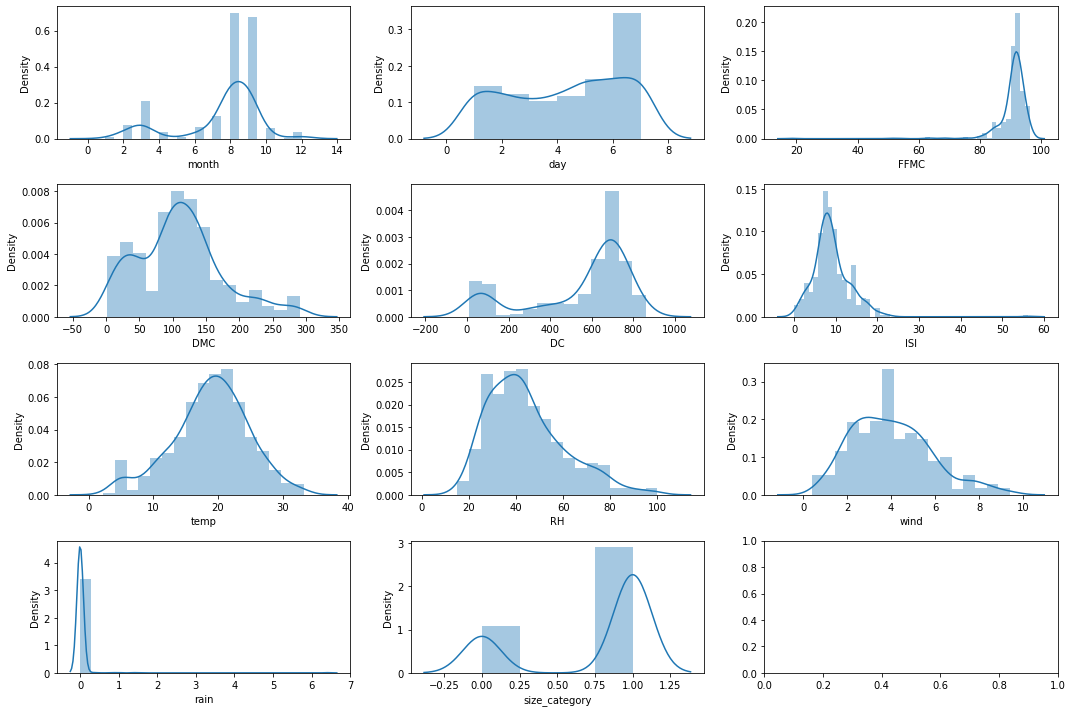

In [120]:
# Visualization using distplot

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(4,3, figsize =(15,10))
sns.distplot(data2.month, ax=ax[0,0])
sns.distplot(data2.day, ax= ax[0,1])
sns.distplot(data2.FFMC, ax= ax[0,2])
sns.distplot(data2.DMC, ax= ax[1,0])
sns.distplot(data2.DC, ax= ax[1,1])
sns.distplot(data2.ISI, ax= ax[1,2])
sns.distplot(data2.temp, ax= ax[2,0])
sns.distplot(data2.RH, ax= ax[2,1])
sns.distplot(data2.wind, ax= ax[2,2])
sns.distplot(data2.rain, ax= ax[3,0])
sns.distplot(data2['size_category'], ax= ax[3,1])

plt.tight_layout()
plt.show()

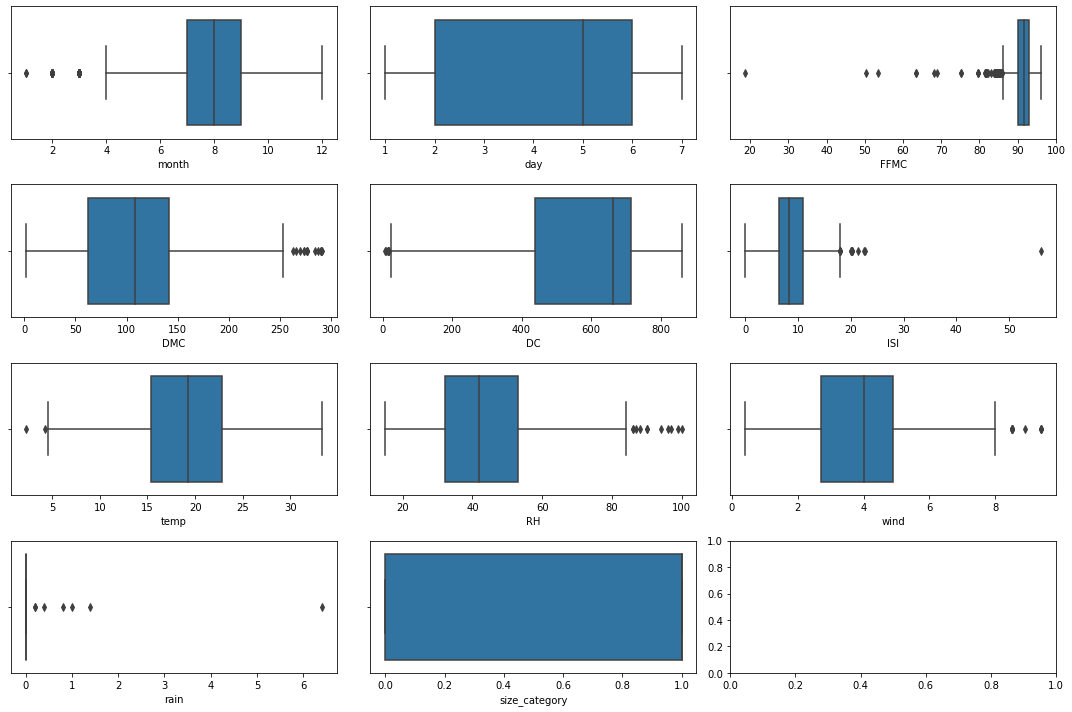

In [121]:
# Checking the outliers

fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(data2.month, ax= ax[0,0])
sns.boxplot(data2.day, ax= ax[0,1])
sns.boxplot(data2.FFMC, ax= ax[0,2])
sns.boxplot(data2.DMC, ax= ax[1,0])
sns.boxplot(data2.DC, ax= ax[1,1])
sns.boxplot(data2.ISI, ax= ax[1,2])
sns.boxplot(data2.temp, ax= ax[2,0])
sns.boxplot(data2.RH, ax= ax[2,1])
sns.boxplot(data2.wind,  ax= ax[2,2])
sns.boxplot(data2.rain, ax= ax[3,0])
sns.boxplot(data2['size_category'], ax= ax[3,1])

plt.tight_layout()
plt.show()

In [122]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data2 = pd.DataFrame(scale.fit_transform(data2))
data2

,0,1,2,3,4,5,6,7,8,9,10
0,0.181818,0.666667,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,1.0
1,0.818182,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,1.0
2,0.818182,0.833333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,1.0
3,0.181818,0.666667,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,1.0
4,0.181818,1.000000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
504,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.0
505,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.0
506,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.0
507,0.636364,0.833333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,1.0


### Extracting the independent and dependent variables 

In [123]:
X = data2.iloc[:,0:10].values
Y = data2.iloc[:,-1].values

In [124]:
X

array([[0.18181818, 0.66666667, 0.87096774, ..., 0.42352941, 0.7       ,
        0.        ],
       [0.81818182, 0.16666667, 0.92774194, ..., 0.21176471, 0.05555556,
        0.        ],
       [0.81818182, 0.83333333, 0.92774194, ..., 0.21176471, 0.1       ,
        0.        ],
       ...,
       [0.63636364, 1.        , 0.8116129 , ..., 0.64705882, 0.7       ,
        0.        ],
       [0.63636364, 0.83333333, 0.97677419, ..., 0.31764706, 0.4       ,
        0.        ],
       [0.90909091, 0.16666667, 0.78451613, ..., 0.18823529, 0.45555556,
        0.        ]])

In [125]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [126]:
# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

In [127]:
# Create model
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

In [128]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [129]:
# Fit the model
model.fit(X,Y, validation_split=0.33, epochs=100,batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 6ms/step - loss: 0.7292 - accuracy: 0.2434 - val_loss: 0.6183 - val_accuracy: 0.3274
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.2434 - val_loss: 0.5258 - val_accuracy: 0.3274
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.2434 - val_loss: 0.3692 - val_accuracy: 0.3274
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.2991 - val_loss: 0.2420 - val_accuracy: 0.5893
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.7155 - val_loss: 0.2472 - val_accuracy: 0.6667
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.7566 - val_loss: 0.2574 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.7566 - val_loss: 0.2532 - val_accuracy: 0.6726
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.7566 - val_loss: 0.2442 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.7566 - val_loss: 0.2431 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.7566 - val_loss: 0.2442 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.7566 - val_loss: 0.2424 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.7566 - val_loss: 0.2390 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.7566 - val_loss: 0.2432 - val_accuracy: 0.6726
Epoch 65/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.7566 - val_loss: 0.2458 - val_accuracy: 0.6726
Epoch 

In [130]:
# Evaluate the model
scores = model.evaluate(X,Y)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.7289
accuracy: 72.89%


In [131]:
history = model.fit(X,Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.7595 - val_loss: 0.2456 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.7625 - val_loss: 0.2440 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.7683 - val_loss: 0.2413 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.7713 - val_loss: 0.2416 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.7713 - val_loss: 0.2437 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.7654 - val_loss: 0.2491 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1781 - accuracy: 0.7683 - val_loss: 0.2454 - val_accuracy: 0.6726
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.7713 - val_loss: 0.2545 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.7713 - val_loss: 0.2551 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.7713 - val_loss: 0.2535 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.7713 - val_loss: 0.2512 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.7713 - val_loss: 0.2536 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.7713 - val_loss: 0.2565 - val_accuracy: 0.6726
Epoch 65/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.7713 - val_loss: 0.2558 - val_accuracy: 0.6726
Epoch 

In [132]:
# Visualize training history

#list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

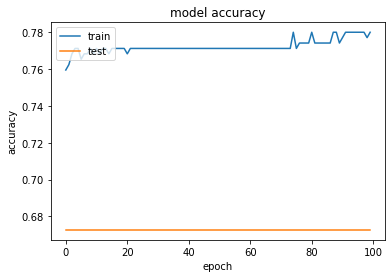

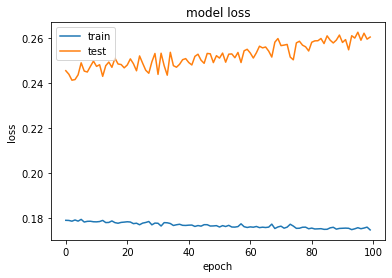

In [133]:
# Summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Tuning of Hyperparameters:- Batch size and Epochs

In [134]:
 # Importing necessary libraries

from sklearn.model_selection import GridSearchCV , KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [135]:
# Create model

def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
    
    adam =Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [136]:
# Create the model
model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size, epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose =10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   1.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.765, total=   0.9s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.510, total=   0.9s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.676, total=   0.9s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.693, total=   0.9s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=1.000, total=   2.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.765, total=   2.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.510, total=   2.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.676, total=   2.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.693, total=   2.1s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=1.000, total=   3.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.765, total=   4.0s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.510, total=   4.2s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.676, total=   3.6s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.693, total=   3.6s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=1.000, total=   0.8s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.3min finished


In [137]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{}, {} with :{}'. format(mean, stdev, param))

Best : 0.728809940814972, using {'batch_size': 10, 'epochs': 10}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 10, 'epochs': 10}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 10, 'epochs': 50}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 10, 'epochs': 100}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 20, 'epochs': 10}
0.71692875623703, 0.16363536306896334 with :{'batch_size': 20, 'epochs': 50}
0.7228693485260009, 0.16102298906717666 with :{'batch_size': 20, 'epochs': 100}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 40, 'epochs': 10}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 40, 'epochs': 50}
0.7228693485260009, 0.16102298906717666 with :{'batch_size': 40, 'epochs': 100}
